# Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil dataset

In [2]:
df = pd.read_csv('USA_cars_datasets.csv')

## BUSSINESS UNDERSTANDING

Pada tahapan ini kita membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data,
dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun.
Banyaknya penduduk menyebabkan banyaknya pengguna sepeda motor di India.
Namun, karena sulitnya ekonomi membuat masyarakat di India lebih memilih membeli motor bekas dikarenakan harga nya lebih terjangkau.
Dari dataset berikut ini berisi sekitar 32649 motor bekas yang ada di India yang diambil dari www.droom.in')
Tujuan dari analisis ini untuk mengetahui estimasi harga motor bekas yang ada di India.')
https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india')

# DATA UNDERSTANDING

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data.
Dari data yang telah diambil mengenai harga motor bekas di India, terdapat 8 kolom yang berisi 4 kolom objek dan 4 kolom float.
Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah.
1. bike_name (nama motor) = objek
2. price (harga) = float
3. city (nama kota) = objek
4. kms_driven (jumlah km yang telah ditempuh) = float
5. owner (pemilik, apakah pemilik motor tersebut merupakan pemilik pertama, kedua, atau ketiga) = objek
6. age (umur motor) = float
7. power (tenaga motor/cc) = float
8. brand (nama pabrikan motor) = objek

# Deskripsi dataset

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# DATA PREPARATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


<AxesSubplot:>

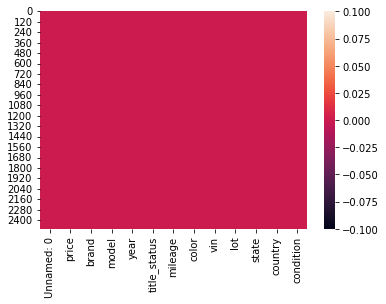

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


# visualisasi data

<AxesSubplot:>

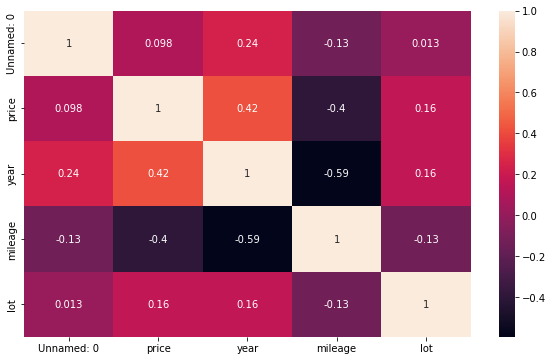

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

# Jumlah mobil berdasarkan model

In [15]:
brands = df.groupby('model').count()[['color']].sort_values(by='color', ascending=True).reset_index()
brands = brands.rename(columns={'color':'jumlah_mobil'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126]),
 [Text(0, 0, 'xterra'),
  Text(1, 0, 'dart'),
  Text(2, 0, 'discovery'),
  Text(3, 0, 'sportage'),
  Text(4, 0, 'spark'),
  Text(5, 0, 'dr'),
  Text(6, 0, 'soul'),
  Text(7, 0, 'mdx'),
  Text(8, 0, 'e-class'),
  Text(9, 0, 'sl-class'),
  Text(10, 0, 'xt5'),
  Text(11, 0, 'nvp'),
  T

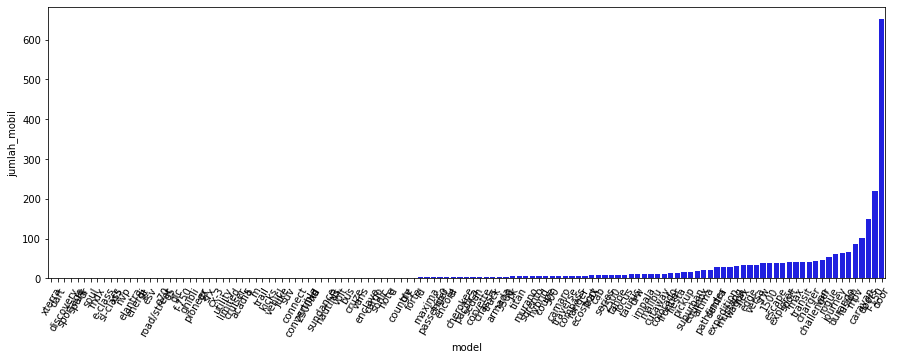

In [16]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=brands['model'], y=brands['jumlah_mobil'], color='blue')
plt.xticks(rotation=60)

# MODELLING DATA

# Seleksi fitur

In [18]:
fitur = ['year', 'mileage', 'lot']
x = df[fitur]
y = df['price']
x.shape, y.shape

((2499, 3), (2499,))

# split data training dan testing

In [19]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(625,)

# membuat regresi linier

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUATION DATA

In [21]:
nilai = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', nilai)

Akurasi Model Regresi Linier :  0.18981928978314577


# membuat inputan regresi linier

Evaluation

In [30]:
inputan = np.array([[2019, 22543, 1.6762]])
prediksi = lr.predict(inputan)
print('Estimasi Harga Mobil : ', prediksi)

Estimasi Harga Mobil :  [-675373.53194707]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# Save model

In [23]:
import pickle
filename = 'estimasi_cars.sav'
pickle.dump(lr,open(filename,'wb'))